##### Image Segmentation with GrabCut

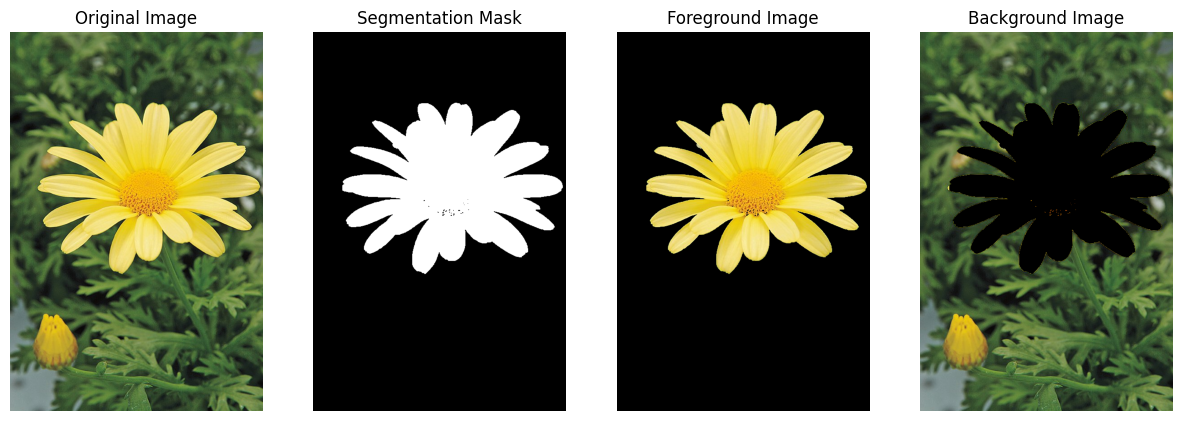

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\daisy.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize mask for GrabCut
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangle parameters that include the foreground
rect = (65, 50, image.shape[1]-50, image.shape[0]-300) 

# Create temporary arrays for the algorithm
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create the final mask for the foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image_rgb * mask2[:, :, np.newaxis]

# Create the background image by inverting the mask
background = image_rgb * (1 - mask2)[:, :, np.newaxis]

# Show the final segmentation mask
mask_display = np.where((mask2 == 1), 255, 0).astype('uint8')  # Convert mask to 255 for visibility

# Display the results
plt.figure(figsize=(15, 10))
plt.subplot(141)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(mask_display, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(143)
plt.imshow(foreground)
plt.title('Foreground Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(background)
plt.title('Background Image')
plt.axis('off')

plt.show()


##### Enhance the Image with a Blurred Background

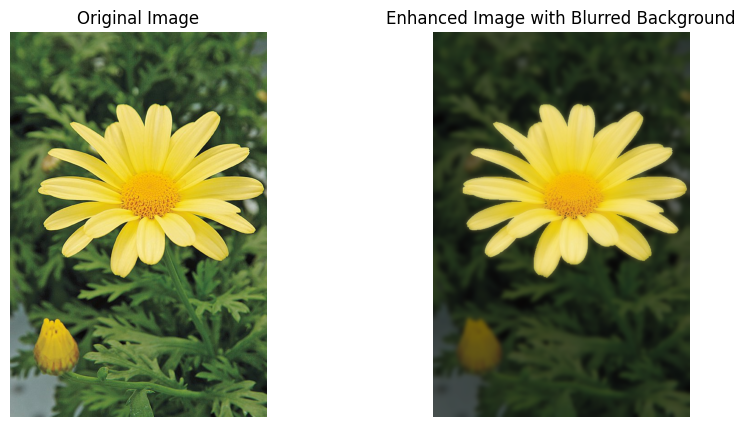

In [7]:
# Create the background by inverting the mask and applying a blur
background = cv2.bitwise_and(image_rgb, image_rgb, mask=255-mask2)
blurred_background = cv2.GaussianBlur(background, (27, 27), 0)

# # Combine the blurred background with the original foreground
# enhanced_image = cv2.add(foreground, blurred_background)

# Combine the blurred background with the original foreground using addWeighted
alpha = 0.5 # Weight of the foreground
beta = 0.5   # Weight of the blurred background
enhanced_image = cv2.addWeighted(foreground, alpha, blurred_background, beta, 0)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(enhanced_image)
plt.title('Enhanced Image with Blurred Background')
plt.axis('off')

plt.show()
